In [39]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.utils import shuffle
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

from sklearn.linear_model import LogisticRegression
import xgboost as xgb

## Text Detection Features

In [20]:
text_detection_features = pd.read_csv("merged-text-features.csv").drop(columns=["Total words_x", "Average words per sentence_x"]).set_index('Id')

X = text_detection_features.drop(columns=['Label'])
y = text_detection_features['Label']

standard_scale = StandardScaler()
X = standard_scale.fit_transform(X)

label_encoder = LabelEncoder()
# 0 = Chatgpt | 1 = Human
y = label_encoder.fit_transform(y)

X_shuffled, y_shuffled = shuffle (X, y, random_state=42)


X_without_flesch = text_detection_features.drop(columns=['Label', 'Flesch-kincaid grade level score'])
X_without_flesch = standard_scale.fit_transform(X_without_flesch)

X_shuffled_no_flesch, y_shuffled_no_flesch = shuffle (X_without_flesch, y, random_state=42)

In [3]:
# text_detection_features

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## Extracted text-features

### Logistic Regression

In [5]:
lr = LogisticRegression()
print('Extracted text-features')
print(f'Logistic Regression Accuracy: {np.mean(cross_val_score(lr, X_shuffled, y_shuffled, cv=5, scoring="accuracy")):.4f}')
print(f'Logistic Regression Precision: {np.mean(cross_val_score(lr, X_shuffled, y_shuffled, cv=5, scoring="precision")):.4f}')
print(f'Logistic Regression Recall: {np.mean(cross_val_score(lr, X_shuffled, y_shuffled, cv=5, scoring="recall")):.4f}')
print(f'Logistic Regression F1: {np.mean(cross_val_score(lr, X_shuffled, y_shuffled, cv=5, scoring="f1")):.4f}')

print('\nWithout Flesch-kincaid')
print(f'Logistic Regression Accuracy: {np.mean(cross_val_score(lr, X_shuffled_no_flesch, y_shuffled_no_flesch, cv=5, scoring="accuracy")):.4f}')
print(f'Logistic Regression Precision: {np.mean(cross_val_score(lr, X_shuffled_no_flesch, y_shuffled_no_flesch, cv=5, scoring="precision")):.4f}')
print(f'Logistic Regression Recall: {np.mean(cross_val_score(lr, X_shuffled_no_flesch, y_shuffled_no_flesch, cv=5, scoring="recall")):.4f}')
print(f'Logistic Regression F1: {np.mean(cross_val_score(lr, X_shuffled_no_flesch, y_shuffled_no_flesch, cv=5, scoring="f1")):.4f}')

Extracted text-features
Logistic Regression Accuracy: 0.9048
Logistic Regression Precision: 0.9240
Logistic Regression Recall: 0.8818
Logistic Regression F1: 0.9011

Without Flesch-kincaid
Logistic Regression Accuracy: 0.9048
Logistic Regression Precision: 0.9240
Logistic Regression Recall: 0.8818
Logistic Regression F1: 0.9011


### XGBoost

In [6]:
xgBoost = xgb.XGBClassifier()

print('Extracted text-features')
print(f'XGBoost Accuracy: {np.mean(cross_val_score(xgBoost, X_shuffled, y_shuffled, cv=5, scoring="accuracy")):.4f}')
print(f'XGBoost Precision: {np.mean(cross_val_score(xgBoost, X_shuffled, y_shuffled, cv=5, scoring="precision")):.4f}')
print(f'XGBoost Recall: {np.mean(cross_val_score(xgBoost, X_shuffled, y_shuffled, cv=5, scoring="recall")):.4f}')
print(f'XGBoost F1: {np.mean(cross_val_score(xgBoost, X_shuffled, y_shuffled, cv=5, scoring="f1")):.4f}')

print('\nWithout Flesch-kincaid')
print(f'XGBoost Accuracy: {np.mean(cross_val_score(xgBoost, X_shuffled_no_flesch, y_shuffled_no_flesch, cv=5, scoring="accuracy")):.4f}')
print(f'XGBoost Precision: {np.mean(cross_val_score(xgBoost, X_shuffled_no_flesch, y_shuffled_no_flesch, cv=5, scoring="precision")):.4f}')
print(f'XGBoost Recall: {np.mean(cross_val_score(xgBoost, X_shuffled_no_flesch, y_shuffled_no_flesch, cv=5, scoring="recall")):.4f}')
print(f'XGBoost F1: {np.mean(cross_val_score(xgBoost, X_shuffled_no_flesch, y_shuffled_no_flesch, cv=5, scoring="f1")):.4f}')

Extracted text-features
XGBoost Accuracy: 0.9128
XGBoost Precision: 0.9181
XGBoost Recall: 0.9126
XGBoost F1: 0.9130

Without Flesch-kincaid
XGBoost Accuracy: 0.9047
XGBoost Precision: 0.9214
XGBoost Recall: 0.8889
XGBoost F1: 0.9027


## TFIDF features

In [7]:
tfidf_features = pd.read_csv("TFIDF-features.csv").set_index('Id')

X_tfidf = tfidf_features.drop(columns=['Label'])
y_tfidf = tfidf_features['Label']

standard_scale = StandardScaler()
X_tfidf = standard_scale.fit_transform(X_tfidf)

label_encoder = LabelEncoder()
# 0 = Chatgpt | 1 = Human
y_tfidf = label_encoder.fit_transform(y_tfidf)

X_shuffled_tfidf, y_shuffled_tfidf = shuffle (X_tfidf, y_tfidf, random_state=42)

### Logistic Regression

In [8]:
lr = LogisticRegression()
print(f'TFIDF')
print(f'Logistic Regression Accuracy: {np.mean(cross_val_score(lr, X_shuffled_tfidf, y_shuffled_tfidf, cv=5, scoring="accuracy")):.4f}')
print(f'Logistic Regression Precision: {np.mean(cross_val_score(lr, X_shuffled_tfidf, y_shuffled_tfidf, cv=5, scoring="precision")):.4f}')
print(f'Logistic Regression Recall: {np.mean(cross_val_score(lr, X_shuffled_tfidf, y_shuffled_tfidf, cv=5, scoring="recall")):.4f}')
print(f'Logistic Regression F1: {np.mean(cross_val_score(lr, X_shuffled_tfidf, y_shuffled_tfidf, cv=5, scoring="f1")):.4f}')


TFIDF
Logistic Regression Accuracy: 0.9522
Logistic Regression Precision: 0.9913
Logistic Regression Recall: 0.9126
Logistic Regression F1: 0.9490


### XGBoost

In [9]:
xgBoost = xgb.XGBClassifier()
# xgBoost.fit(X_train, y_train)
print(f'TFIDF')
print(f'XGBoost Accuracy: {np.mean(cross_val_score(xgBoost, X_shuffled_tfidf, y_shuffled_tfidf, cv=5, scoring="accuracy")):.4f}')
print(f'XGBoost Precision: {np.mean(cross_val_score(xgBoost, X_shuffled_tfidf, y_shuffled_tfidf, cv=5, scoring="precision")):.4f}')
print(f'XGBoost Recall: {np.mean(cross_val_score(xgBoost, X_shuffled_tfidf, y_shuffled_tfidf, cv=5, scoring="recall")):.4f}')
print(f'XGBoost F1: {np.mean(cross_val_score(xgBoost, X_shuffled_tfidf, y_shuffled_tfidf, cv=5, scoring="f1")):.4f}')


TFIDF
XGBoost Accuracy: 0.9205
XGBoost Precision: 0.9355
XGBoost Recall: 0.9040
XGBoost F1: 0.9186


## New data analysis

In [28]:
new_data_set = pd.read_csv('merged-text-features-new-dataset.csv').set_index('Id')
new_data_set = new_data_set[new_data_set['Flesch-kincaid grade level score'] > 0]
X_new = new_data_set.drop(columns=['Label'])
# 0 = Chatgpt | 1 = Human
y_new = new_data_set['Label']

standard_scale = StandardScaler()
X_new = standard_scale.fit_transform(X_new)

X_shuffled_new, y_shuffled_new = shuffle (X_new, y_new, random_state=42)

X_new_without_flesch = new_data_set.drop(columns=['Label', 'Flesch-kincaid grade level score'])
X_new_without_flesch = standard_scale.fit_transform(X_new_without_flesch)

X_new_shuffled_no_flesch, y_new_shuffled_no_flesch = shuffle (X_new_without_flesch, y_new, random_state=42)

### Logistic Regression

In [46]:
lr = LogisticRegression()
lr.fit(X,y)
lr_predicted = lr.predict(X_shuffled_new)
print('With Flesch')
print(f'Logistic Regression Accuracy: {lr.score(X_shuffled_new, y_shuffled_new):.4f}')
print(f'Logistic Regression Precision: {precision_score(lr_predicted, y_shuffled_new):.4f}')
print(f'Logistic Regression Recall: {recall_score(lr_predicted, y_shuffled_new):.4f}')
print(f'Logistic Regression F1: {f1_score(lr_predicted, y_shuffled_new):.4f}')

print('\nWithout Flesch')
lr.fit(X_shuffled_no_flesch, y_shuffled_no_flesch)
lr_predicted = lr.predict(X_new_shuffled_no_flesch)
print(f'Logistic Regression Accuracy: {lr.score(X_new_shuffled_no_flesch, y_new_shuffled_no_flesch):.4f}')
print(f'Logistic Regression Precision: {precision_score(lr_predicted, y_new_shuffled_no_flesch):.4f}')
print(f'Logistic Regression Recall: {recall_score(lr_predicted, y_new_shuffled_no_flesch):.4f}')
print(f'Logistic Regression F1: {f1_score(lr_predicted, y_new_shuffled_no_flesch):.4f}')

With Flesch
Logistic Regression Accuracy: 0.5374
Logistic Regression Precision: 0.5283
Logistic Regression Recall: 0.6310
Logistic Regression F1: 0.5751

Without Flesch
Logistic Regression Accuracy: 0.5324
Logistic Regression Precision: 0.5178
Logistic Regression Recall: 0.6278
Logistic Regression F1: 0.5675


### XGBoost

In [50]:
xgBoost = xgb.XGBClassifier()
xgBoost.fit(X, y)
xg_predicted = xgBoost.predict(X_shuffled_new)
print('With Flesch')
print(f'XGBoost Accuracy: {xgBoost.score(X_shuffled_new, y_shuffled_new):.4f}')
print(f'XGBoost Precision: {precision_score(xg_predicted, y_shuffled_new):.4f}')
print(f'XGBoost Recall: {recall_score(xg_predicted, y_shuffled_new):.4f}')
print(f'XGBoost F1: {f1_score(xg_predicted, y_shuffled_new):.4f}')

xgBoost.fit(X_shuffled_no_flesch, y_shuffled_no_flesch)
xg_predicted = xgBoost.predict(X_new_shuffled_no_flesch)
print('\nWithout Flesch')
print(f'XGBoost Accuracy: {xgBoost.score(X_new_shuffled_no_flesch, y_new_shuffled_no_flesch):.4f}')
print(f'XGBoost Precision: {precision_score(xg_predicted, y_new_shuffled_no_flesch):.4f}')
print(f'XGBoost Recall: {recall_score(xg_predicted, y_new_shuffled_no_flesch):.4f}')
print(f'XGBoost F1: {f1_score(xg_predicted, y_new_shuffled_no_flesch):.4f}')


With Flesch
XGBoost Accuracy: 0.6253
XGBoost Precision: 0.7047
XGBoost Recall: 0.6764
XGBoost F1: 0.6903

Without Flesch
XGBoost Accuracy: 0.6216
XGBoost Precision: 0.7245
XGBoost Recall: 0.6662
XGBoost F1: 0.6941


## PCA Feature analysis

In [10]:
X.shape[1]

238

In [30]:
pca = PCA(n_components=X.shape[1])
pca_fit = pca.fit(X)

data = text_detection_features.drop(columns=['Label'])
features = data.columns

n_pcs = pca_fit.components_.shape[0]

pca_1_features = pd.DataFrame(np.abs(pca_fit.components_[0]), features).transpose()
pca_1_features = pca_1_features.max(axis=0).sort_values(ascending=False)[:20]/pca_1_features.max(axis=0).sort_values(ascending=False)[0]
pca_1_features = pd.DataFrame(pca_1_features)
pca_1_features = pca_1_features.reset_index()
pca_1_features

,index,0
0,Total characters,1.000000
1,Common char bigram 21,0.995954
2,Common char bigram 22,0.994949
3,Common char bigram 20,0.994885
4,Common char bigram 23,0.994737
5,Common char bigram 19,0.993992
6,Common char bigram 18,0.993435
7,Common char bigram 24,0.992429
8,Common char bigram 15,0.991864
9,Common char bigram 27,0.991682


<Axes: title={'center': 'V comp'}, xlabel='index'>

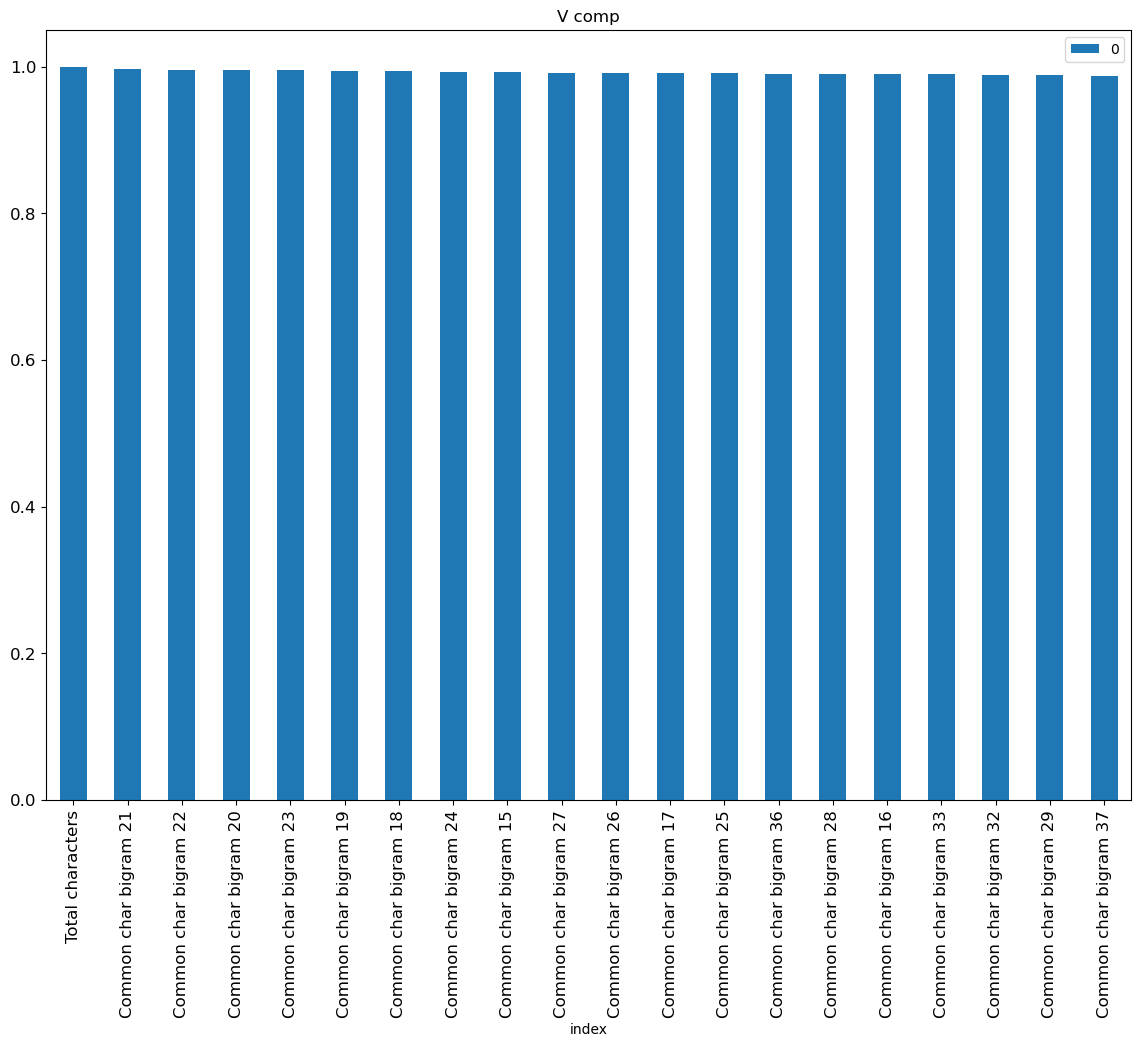

In [31]:
pca_1_features.plot(x='index', y=0, kind='bar', title ="PCA", figsize=(14, 10), legend=True, fontsize=12)

In [16]:
# Extracting best features based on PCA
most_important = [np.abs(pca_fit.components_[i]).argmax() for i in range(21)]
most_important_values = [np.abs(pca_fit.components_[i]).max() for i in range(21)]
most_important_names = [features[most_important[i]] for i in range(21)]
dic = {most_important_names[i]: most_important_values[i] for i in range(21)}
df = pd.DataFrame(dic.items())
df[1] = df[1]/df[1].max()
# df

<Axes: title={'center': 'V comp'}, xlabel='0'>

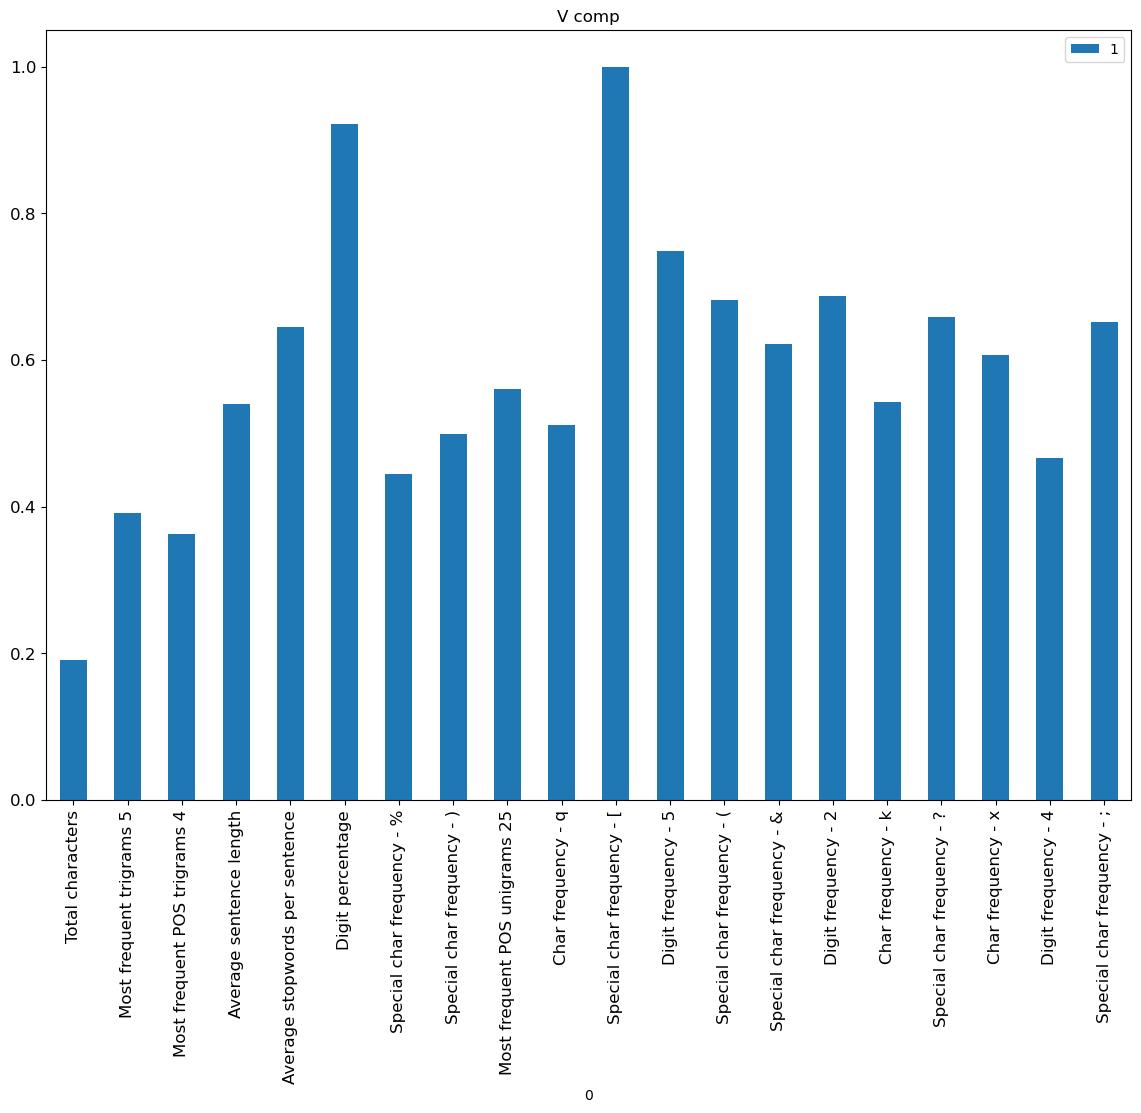

In [14]:
# plt.bar(columns,values)
df.plot(x=0, y=1, kind='bar', title ="V comp", figsize=(14, 10), legend=True, fontsize=12)
# plt.hist(df.transpose()[1])
# df